# Project: Wrangling and Analyze WeRateDogs Datasets

## Table of contents


- <a href="#Gathering-Data">Gathering Data</a>
- <a href="#Assessing-Data">Assessing Data</a>
- <a href="#Assessment-Summary">Assessment Summary</a>
- <a href="#Cleaning-Data">Cleaning Data</a>
- <a href="#Storing-Data">Storing Data</a>
- <a href="#Analyzing-and-Visualizing-Data">Analyzing and Visualizing Data</a>



## Gathering Data

In [1]:
# Import all the packages needed for my analysis

import pandas as pd
import numpy as np
import requests
import json
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Twitter Archive Enchanced File

In [2]:
# Read CSV (comma-separated) file into DataFrame
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


### Image Predictions File

In [4]:
# Use requests library to download tsv file
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)

# Save the file to the computer
open('image-predictions.tsv', 'wb').write(r.content)

# Read TSV file
image_predictions=pd.read_csv('image-predictions.tsv', sep="\t")

In [5]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


### Twitter JSON Data

##### Install tweepy, An easy-to-use Python library for accessing the Twitter API.

In [6]:
pip install tweepy==4.9.0

In [7]:
import tweepy

In [8]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions

consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,wait_on_rate_limit=True)

In [9]:
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

2356

In [10]:
# For loop which will add each available tweet to a new line of tweet-json.txt
with open('tweet_json.txt', 'a', encoding='utf8') as f:
    for tweet_id in tweet_ids:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, f)
            f.write('\n')
        except:
            continue

Rate limit reached. Sleeping for: 134
Rate limit reached. Sleeping for: 227


In [11]:
tweets = []
for line in open('tweet_json.txt', 'r'):
    tweets.append(json.loads(line))

In [12]:
#creat a list of data from tweet_json.txt
json_data = []
for twitter_data in tweets:
    # Create a dictionary with the JSON data
    json_data.append({'tweet_id' : twitter_data['id'],
                       'retweets': twitter_data['retweet_count'],
                       'favorites' : twitter_data['favorite_count']})
   

In [14]:
#create a Dataframe
tweets_df = pd.DataFrame(json_data, columns = ['tweet_id', 'favorites' , 'retweets']) 
#Check out the obatined DataFrame
tweets_df.head

<bound method NDFrame.head of                 tweet_id  favorites  retweets
0     892420643555336193      33824      7009
1     892177421306343426      29336      5302
2     891815181378084864      22065      3482
3     891689557279858688      36947      7228
4     891327558926688256      35317      7764
...                  ...        ...       ...
2321  666049248165822465         89        37
2322  666044226329800704        247       115
2323  666033412701032449        100        36
2324  666029285002620928        112        39
2325  666020888022790149       2292       423

[2326 rows x 3 columns]>

## Assessing Data

### Twitter Archive

In [15]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [16]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [17]:
# A concise summary of the dataframe,including the number of non-null values in each colum
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [18]:
twitter_archive.timestamp

0       2017-08-01 16:23:56 +0000
1       2017-08-01 00:17:27 +0000
2       2017-07-31 00:18:03 +0000
3       2017-07-30 15:58:51 +0000
4       2017-07-29 16:00:24 +0000
                  ...            
2351    2015-11-16 00:24:50 +0000
2352    2015-11-16 00:04:52 +0000
2353    2015-11-15 23:21:54 +0000
2354    2015-11-15 23:05:30 +0000
2355    2015-11-15 22:32:08 +0000
Name: timestamp, Length: 2356, dtype: object

In [19]:
twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [20]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
0         1
120       1
7         1
170       1
150       1
130       1
90        1
110       1
2         1
70        1
40        1
16        1
15        1
Name: rating_denominator, dtype: int64

In [21]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
0         2
15        2
75        2
420       2
182       1
204       1
143       1
121       1
99        1
20        1
45        1
27        1
17        1
24        1
26        1
44        1
50        1
60        1
80        1
84        1
88        1
1776      1
960       1
666       1
144       1
165       1
Name: rating_numerator, dtype: int64

In [22]:
twitter_archive.name.value_counts()

None       745
a           55
Charlie     12
Cooper      11
Oliver      11
          ... 
Gustaf       1
Sonny        1
Tedrick      1
Venti        1
Rey          1
Name: name, Length: 957, dtype: int64

### Image Predictions

In [23]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [24]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [25]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


### Tweets_df

In [26]:
tweets_df

,tweet_id,favorites,retweets
0,892420643555336193,33824,7009
1,892177421306343426,29336,5302
2,891815181378084864,22065,3482
3,891689557279858688,36947,7228
4,891327558926688256,35317,7764
...,...,...,...
2321,666049248165822465,89,37
2322,666044226329800704,247,115
2323,666033412701032449,100,36
2324,666029285002620928,112,39


In [27]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2326 entries, 0 to 2325
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   tweet_id   2326 non-null   int64
 1   favorites  2326 non-null   int64
 2   retweets   2326 non-null   int64
dtypes: int64(3)
memory usage: 54.6 KB


In [28]:
tweets_df.describe()

,tweet_id,favorites,retweets
count,2.326000e+03,2326.000000,2326.000000
mean,7.417676e+17,7059.605761,2473.177128
std,6.821161e+16,10967.561430,4187.145882
min,6.660209e+17,0.000000,1.000000
25%,6.780814e+17,1229.000000,495.500000
50%,7.178159e+17,3053.000000,1150.000000
75%,7.986402e+17,8613.000000,2863.750000
max,8.924206e+17,144940.000000,70774.000000


## Assessment Summary

### **Quality issues:**

*twitter_archive* table:
1. Keep original ratings (no retweets).
2. Drop columns not needed for our analysis(in_reply_to_status_id, in_reply_to_user_id, expanded_urls).
3. Incorrect tweet_id datatype.
4. +0000 in timestamp is redundant.
5. Incorrect timestamp datatype.
6. Twitter source unreadable.
7. Url in the end of 'text '
8. Dogs without names, but given names of “a” or “an” instead of “None.”
9. The "rating_numerator and denominator has some incorrect values.
10. Erroneous datatypes of 'rating numerator' and 'rating denominator'.
11. Consider rating_denominator to be 10 and drop column.
12. Rating_numerator maximum possible value is 15.


*image_predictions* table:
1. Incorrect tweet_id datatype.
2. Drop column not needed for our analysis (img_num).

*tweets_df* table:
1. Incorrect tweet_id datatype.


### **Tidiness issues:**
1. There are 3 three dataframes.
2. There are 4 columns for dog stages (doggo, floofer, pupper, puppo) in twitter_archive table.
3. There are 3 columns for breed predictions(p1,p2,p3) in image_predictions table.


## Cleaning Data

In [29]:
# create copies of the dataframes for cleaning
tw_archive_clean = twitter_archive.copy()
im_predictions_clean = image_predictions.copy()
tw_df_clean = tweets_df.copy()

### Quality 1: Keep original tweets in twitter_archive table

#### Define
Remove 181 retweets (retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp)

#### Code

In [30]:
# Removing the retweet information 
tw_archive_clean=tw_archive_clean[tw_archive_clean.retweeted_status_id.isnull()]
tw_archive_clean=tw_archive_clean[tw_archive_clean.retweeted_status_user_id.isnull()]
tw_archive_clean=tw_archive_clean[tw_archive_clean.retweeted_status_timestamp.isnull()]

#### Test

In [31]:
tw_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

### Quality 2: Remove Columns not needed for analysis

#### Define

Drop columns not needed for our analysis ('in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
                                            'retweeted_status_user_id','retweeted_status_timestamp', 'expanded_urls)

#### Code

In [32]:
 #drop columns
tw_archive_clean = tw_archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
                                            'retweeted_status_user_id','retweeted_status_timestamp', 'expanded_urls'],axis= 1)

#### Test

In [33]:
tw_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   rating_numerator    2175 non-null   int64 
 5   rating_denominator  2175 non-null   int64 
 6   name                2175 non-null   object
 7   doggo               2175 non-null   object
 8   floofer             2175 non-null   object
 9   pupper              2175 non-null   object
 10  puppo               2175 non-null   object
dtypes: int64(3), object(8)
memory usage: 203.9+ KB


### Quality 3: Tweet_id incorrect datatype

#### Define

fix tweet_id datatype with .astype(str)

#### Code

In [34]:
# Convert tweet_id to str from twitter_archive, image_prediction, twitter_data tables.
tw_archive_clean.tweet_id = tw_archive_clean.tweet_id.astype(str)
im_predictions_clean.tweet_id = im_predictions_clean.tweet_id.astype(str)
tw_df_clean.tweet_id = tw_df_clean.tweet_id.astype(str)

#### Test

In [35]:
tw_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   object
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   rating_numerator    2175 non-null   int64 
 5   rating_denominator  2175 non-null   int64 
 6   name                2175 non-null   object
 7   doggo               2175 non-null   object
 8   floofer             2175 non-null   object
 9   pupper              2175 non-null   object
 10  puppo               2175 non-null   object
dtypes: int64(2), object(9)
memory usage: 203.9+ KB


In [36]:
im_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [37]:
tw_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2326 entries, 0 to 2325
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   2326 non-null   object
 1   favorites  2326 non-null   int64 
 2   retweets   2326 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 54.6+ KB


### Quality 4: Timestamp(remove +0000 and fix datatype) in twitter_archive table

#### Define

Remove +0000 from timestamp

#### Code

In [38]:
tw_archive_clean.timestamp = tw_archive_clean.timestamp.str[:-5].str.strip()

#### Test

In [39]:
tw_archive_clean.timestamp.value_counts()

2017-05-04 23:34:55    1
2016-01-25 17:35:00    1
2016-03-11 18:18:36    1
2015-12-13 04:14:39    1
2015-11-17 02:00:15    1
                      ..
2016-03-05 23:51:49    1
2015-12-27 19:22:30    1
2016-01-19 01:18:43    1
2015-12-17 03:48:51    1
2015-12-09 01:07:00    1
Name: timestamp, Length: 2175, dtype: int64

#### Define

fix timestamp datatype

#### Code

In [40]:
# convert timestamp to datetime
tw_archive_clean.timestamp = pd.to_datetime(tw_archive_clean.timestamp)

#### Test

In [41]:
tw_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2175 non-null   object        
 1   timestamp           2175 non-null   datetime64[ns]
 2   source              2175 non-null   object        
 3   text                2175 non-null   object        
 4   rating_numerator    2175 non-null   int64         
 5   rating_denominator  2175 non-null   int64         
 6   name                2175 non-null   object        
 7   doggo               2175 non-null   object        
 8   floofer             2175 non-null   object        
 9   pupper              2175 non-null   object        
 10  puppo               2175 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 203.9+ KB


#### Define

fix source datatype

#### Code

In [42]:
# convert source to category datatype
tw_archive_clean.source = tw_archive_clean.source.astype("category")

#### Test

In [43]:
tw_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2175 non-null   object        
 1   timestamp           2175 non-null   datetime64[ns]
 2   source              2175 non-null   category      
 3   text                2175 non-null   object        
 4   rating_numerator    2175 non-null   int64         
 5   rating_denominator  2175 non-null   int64         
 6   name                2175 non-null   object        
 7   doggo               2175 non-null   object        
 8   floofer             2175 non-null   object        
 9   pupper              2175 non-null   object        
 10  puppo               2175 non-null   object        
dtypes: category(1), datetime64[ns](1), int64(2), object(7)
memory usage: 189.2+ KB


### Quality 5: Source (Remove tags and fix incorrect datatype to catergory) in twitter_archive table

#### Define

Remove tags by using string extract method 

#### Code

In [44]:
tw_archive_clean['source'] = tw_archive_clean['source'].str.extract('^<a.+>(.+)</a>$')

#### Test

In [45]:
tw_archive_clean.source.value_counts()

Twitter for iPhone     2042
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

### Quality 6: Url in text column 

#### Define

Remove url in text ("http\....)

#### Code

In [46]:
tw_archive_clean['text'] = tw_archive_clean.text.str.replace(r"http\S+", "").str.strip()

<ipython-input-46-3c3c679f6c04>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  tw_archive_clean['text'] = tw_archive_clean.text.str.replace(r"http\S+", "").str.strip()


#### Test

In [47]:
tw_archive_clean.text[20]

"This is Gerald. He was just told he didn't get the job he interviewed for. A h*ckin injustice. 12/10 didn't want the job anyway"

### Quality 7: Missing values and labels in name column

#### Define

Replace missing values and miss labels(None,a) with nul values

#### Code

In [48]:
tw_archive_clean['name']=tw_archive_clean.name.replace(['None', 'a'], np.nan)

#### Test

In [49]:
tw_archive_clean.name.value_counts()

Lucy         11
Charlie      11
Cooper       10
Oliver       10
Penny         9
             ..
Kathmandu     1
Charl         1
Kobe          1
Beebop        1
Kuyu          1
Name: name, Length: 954, dtype: int64

### Quality 8: The "rating_numerator and denominator has some incorrect values.

#### Define 

Extract both numerator and denominator from 'text' column.

#### Code

In [50]:
# Extract rating numerators from 'text' column and attribute them to'rating_numerator' column
tw_archive_clean[['rating_numerator','rating_denominator']]= tw_archive_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)',expand=True)

#### Test

In [51]:
tw_archive_clean['rating_numerator'].value_counts()

12       500
10       442
11       426
13       307
9        156
8         98
7         53
14        43
5         34
6         32
3         19
4         17
2          9
1          8
0          2
420        2
143        1
84         1
121        1
15         1
17         1
11.26      1
20         1
666        1
99         1
9.75       1
007        1
45         1
960        1
11.27      1
144        1
165        1
1776       1
9.5        1
204        1
24         1
60         1
88         1
44         1
50         1
80         1
182        1
13.5       1
Name: rating_numerator, dtype: int64

In [52]:
tw_archive_clean['rating_denominator'].value_counts()

10     2153
50        3
11        2
20        2
80        2
70        1
110       1
170       1
150       1
00        1
16        1
120       1
7         1
40        1
2         1
130       1
90        1
15        1
Name: rating_denominator, dtype: int64

### Quality 9: Erroneous datatypes of 'rating numerator' and 'rating denominator'.

#### Define

Convert the data type in both 'rating_numerator' and 'rating_denominator' columns as float.

#### Code

In [53]:
# Convert the data type in both 'rating_numerator' and 'rating_denominator' columns as float
tw_archive_clean['rating_numerator']= tw_archive_clean['rating_numerator'].astype(float)
tw_archive_clean['rating_denominator']= tw_archive_clean['rating_denominator'].astype(float)

#### Test

In [54]:
tw_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2175 non-null   object        
 1   timestamp           2175 non-null   datetime64[ns]
 2   source              2175 non-null   object        
 3   text                2175 non-null   object        
 4   rating_numerator    2175 non-null   float64       
 5   rating_denominator  2175 non-null   float64       
 6   name                1440 non-null   object        
 7   doggo               2175 non-null   object        
 8   floofer             2175 non-null   object        
 9   pupper              2175 non-null   object        
 10  puppo               2175 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(8)
memory usage: 268.4+ KB


### Quality 10: Drop rating_denominator column

#### Define

Let rating_denominator to be 10 for all entries. Hence, because all the entries have only one value 10, then drop this varible. You don't want to have the entire column with all zeros.

#### Code

In [55]:
tw_archive_clean = tw_archive_clean.drop('rating_denominator', axis=1)

#### Test

In [56]:
tw_archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator', 'name',
       'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

### Quality 11: rating_numerator (0-15) and rename to rating

#### Define

If rating_numerator is higer than 15 let it be 15. Assume that 15 is the maximum possible value. Everything higher are outliers.

#### Code

In [57]:
tw_archive_clean.loc[tw_archive_clean['rating_numerator']>15, 'rating_numerator'] = 15


In [58]:
# Rename column
tw_archive_clean.rename(index = str, columns = {'rating_numerator': 'rating'}, inplace = True)

#### Test

In [59]:
tw_archive_clean.rating.value_counts()

12.00    500
10.00    442
11.00    426
13.00    307
9.00     156
8.00      98
7.00      54
14.00     43
5.00      34
6.00      32
15.00     23
3.00      19
4.00      17
2.00       9
1.00       8
0.00       2
9.50       1
13.50      1
11.27      1
11.26      1
9.75       1
Name: rating, dtype: int64

### Tidiness 1: Melt doggo, floofer, pupper, and puppo into one column (dog_stage)

#### Define

- create new column dog_stage 
- add doggo, floofer, pupper, and puppo into dog_stage

#### Code

In [60]:
tw_archive_clean['dog_stage'] = tw_archive_clean.doggo + tw_archive_clean.floofer + tw_archive_clean.pupper + tw_archive_clean.puppo

#### Test

In [61]:
tw_archive_clean['dog_stage'].value_counts()

NoneNoneNoneNone        1831
NoneNonepupperNone       224
doggoNoneNoneNone         75
NoneNoneNonepuppo         24
doggoNonepupperNone       10
NoneflooferNoneNone        9
doggoflooferNoneNone       1
doggoNoneNonepuppo         1
Name: dog_stage, dtype: int64

#### Define
Remove None from the concatenation

#### Code

In [62]:
tw_archive_clean['dog_stage'] = tw_archive_clean['dog_stage'].map(lambda x: x.replace("None",""))


#### Test

In [63]:
tw_archive_clean['dog_stage'].value_counts()

                1831
pupper           224
doggo             75
puppo             24
doggopupper       10
floofer            9
doggopuppo         1
doggofloofer       1
Name: dog_stage, dtype: int64

#### Define

Add comma to doggopupper,doggopuppo,doggofloofer

In [64]:
tw_archive_clean.loc[tw_archive_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
tw_archive_clean.loc[tw_archive_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
tw_archive_clean.loc[tw_archive_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

#### Test

In [65]:
tw_archive_clean['dog_stage'].value_counts()

                  1831
pupper             224
doggo               75
puppo               24
doggo, pupper       10
floofer              9
doggo, floofer       1
doggo, puppo         1
Name: dog_stage, dtype: int64

#### Define

Replace empty fields with null values

#### Code

In [66]:
tw_archive_clean['dog_stage']=tw_archive_clean.dog_stage.replace([''], np.nan)

#### Test

In [67]:
tw_archive_clean['dog_stage'].value_counts()

pupper            224
doggo              75
puppo              24
doggo, pupper      10
floofer             9
doggo, floofer      1
doggo, puppo        1
Name: dog_stage, dtype: int64

#### Define 

Drop doggo,floofer,pupper,and puppo as its no longer needed

#### Code

In [68]:
tw_archive_clean.drop(['doggo','floofer','pupper','puppo'],axis=1, inplace=True)

#### Test

In [69]:
tw_archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating', 'name',
       'dog_stage'],
      dtype='object')

### Tidiness 2: create a new column (best_dog) based on the image predictions 

#### Define

Create conditional columns with Numpy select()

#### Code

In [70]:
# setup the conditions for selection
conditions = [(im_predictions_clean['p1_dog'] == True),
              (im_predictions_clean['p2_dog'] == True),
              (im_predictions_clean['p3_dog'] == True)]

# set the choice order based on the selection conditions for predicted breed
breed = [im_predictions_clean['p1'], 
                 im_predictions_clean['p2'],
                 im_predictions_clean['p3']]


# select the predicted breed based on the first successful condition
im_predictions_clean['best_dog'] = np.select(conditions, breed, 
                                       default = 'none')

#### Test

In [71]:
im_predictions_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,best_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,miniature_pinscher
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,basset
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,Labrador_retriever
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,Chihuahua
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,Chihuahua


#### Define

Correct the dog breed case with .title()

#### Code

In [72]:
im_predictions_clean['best_dog'] = im_predictions_clean['best_dog'].str.title()

#### Test

In [73]:
im_predictions_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,best_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_Springer_Spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,Redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_Shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_Ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,Miniature_Pinscher
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,Basset
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,Labrador_Retriever
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,Chihuahua
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,Chihuahua


In [74]:
im_predictions_clean.best_dog.value_counts()

None                  324
Golden_Retriever      173
Labrador_Retriever    113
Pembroke               96
Chihuahua              95
                     ... 
Standard_Schnauzer      1
Irish_Wolfhound         1
Scotch_Terrier          1
Japanese_Spaniel        1
Silky_Terrier           1
Name: best_dog, Length: 114, dtype: int64

#### Define

Replace None with null values

#### Code

In [75]:
im_predictions_clean['best_dog']=im_predictions_clean.best_dog.replace(['None'], np.nan)

#### Test

In [76]:
im_predictions_clean.best_dog.value_counts()

Golden_Retriever      173
Labrador_Retriever    113
Pembroke               96
Chihuahua              95
Pug                    65
                     ... 
Entlebucher             1
Irish_Wolfhound         1
Japanese_Spaniel        1
Scotch_Terrier          1
Clumber                 1
Name: best_dog, Length: 113, dtype: int64

#### Define

Drop unneccesary columns in image predictions table

#### Code

In [77]:
# Drop unused columns
im_predictions_clean = im_predictions_clean.drop(columns=['img_num','p1', 'p1_conf', 'p1_dog',
                                                'p2', 'p2_conf', 'p2_dog',
                                                'p3', 'p3_conf', 'p3_dog'])

#### Test

In [78]:
im_predictions_clean

,tweet_id,jpg_url,best_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_Springer_Spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,Redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_Shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_Ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,Miniature_Pinscher
...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,Basset
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_Retriever
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua


In [79]:
tw_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2175 entries, 0 to 2355
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   tweet_id   2175 non-null   object        
 1   timestamp  2175 non-null   datetime64[ns]
 2   source     2175 non-null   object        
 3   text       2175 non-null   object        
 4   rating     2175 non-null   float64       
 5   name       1440 non-null   object        
 6   dog_stage  344 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 135.9+ KB


In [80]:
im_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tweet_id  2075 non-null   object
 1   jpg_url   2075 non-null   object
 2   best_dog  1751 non-null   object
dtypes: object(3)
memory usage: 48.8+ KB


In [81]:
tw_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2326 entries, 0 to 2325
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   2326 non-null   object
 1   favorites  2326 non-null   int64 
 2   retweets   2326 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 54.6+ KB


### Merge cleaned datasets 

In [82]:
# Merge 'twitter_archive_clean' and 'img_predictions_clean'
df_clean = pd.merge(tw_archive_clean, im_predictions_clean,
                                   how = 'inner', on = 'tweet_id')
# Merge 'df_clean' and 'tweets_df_clean'
df_clean = pd.merge(df_clean, tw_df_clean,
                                   how = 'inner', on = 'tweet_id')

In [83]:
df_clean

,tweet_id,timestamp,source,text,rating,name,dog_stage,jpg_url,best_dog,favorites,retweets
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13.0,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,NaN,33824,7009
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13.0,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,29336,5302
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12.0,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,22065,3482
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13.0,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_Retriever,36947,7228
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12.0,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,Basset,35317,7764
...,...,...,...,...,...,...,...,...,...,...,...
1981,666049248165822465,2015-11-16 00:24:50,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,5.0,NaN,NaN,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,Miniature_Pinscher,89,37
1982,666044226329800704,2015-11-16 00:04:52,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,6.0,NaN,NaN,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_Ridgeback,247,115
1983,666033412701032449,2015-11-15 23:21:54,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,9.0,NaN,NaN,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_Shepherd,100,36
1984,666029285002620928,2015-11-15 23:05:30,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,7.0,NaN,NaN,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,Redbone,112,39


In [84]:
df_clean.shape

(1986, 11)

In [85]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 1985
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   tweet_id   1986 non-null   object        
 1   timestamp  1986 non-null   datetime64[ns]
 2   source     1986 non-null   object        
 3   text       1986 non-null   object        
 4   rating     1986 non-null   float64       
 5   name       1386 non-null   object        
 6   dog_stage  305 non-null    object        
 7   jpg_url    1986 non-null   object        
 8   best_dog   1678 non-null   object        
 9   favorites  1986 non-null   int64         
 10  retweets   1986 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(7)
memory usage: 186.2+ KB


## Storing Data

In [86]:
df_clean.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data

In [87]:
## Create a copy of merged dataset

df_rate_dogs = df_clean.copy()

In [88]:
df_rate_dogs.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 1985
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   tweet_id   1986 non-null   object        
 1   timestamp  1986 non-null   datetime64[ns]
 2   source     1986 non-null   object        
 3   text       1986 non-null   object        
 4   rating     1986 non-null   float64       
 5   name       1386 non-null   object        
 6   dog_stage  305 non-null    object        
 7   jpg_url    1986 non-null   object        
 8   best_dog   1678 non-null   object        
 9   favorites  1986 non-null   int64         
 10  retweets   1986 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(7)
memory usage: 186.2+ KB


#### Descriptive Statistics

In [89]:
df_rate_dogs.describe() 

,rating,favorites,retweets
count,1986.000000,1986.00000,1986.000000
mean,10.572900,7712.97281,2244.573011
std,2.224625,11378.49900,4020.635473
min,0.000000,66.00000,11.000000
25%,10.000000,1637.50000,495.500000
50%,11.000000,3467.00000,1080.000000
75%,12.000000,9561.75000,2559.250000
max,15.000000,144940.00000,70774.000000


### Insight 1: Distribution of ratings

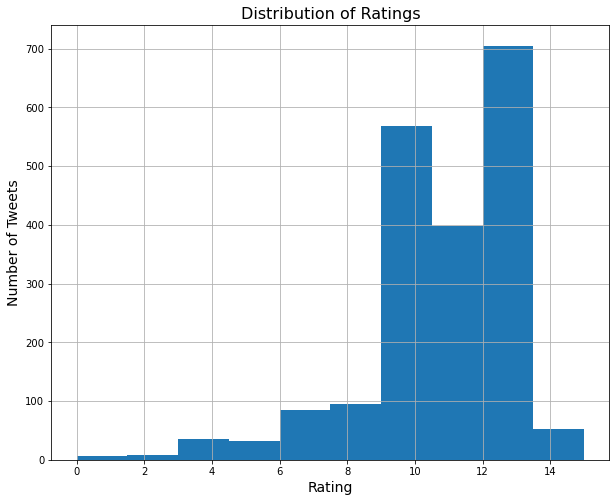

In [90]:
df_rate_dogs.rating.hist(figsize=(10,8));

plt.ylabel('Number of Tweets', fontsize = 14)
plt.xlabel('Rating', fontsize = 14)
plt.title('Distribution of Ratings', fontsize = 16)
plt.show();

- The ratings distribution is left skewed

### Insight 2: Most used twitter source

In [91]:
twitter_source = df_rate_dogs.source.value_counts()

In [92]:
twitter_source

Twitter for iPhone    1948
Twitter Web Client      28
TweetDeck               10
Name: source, dtype: int64

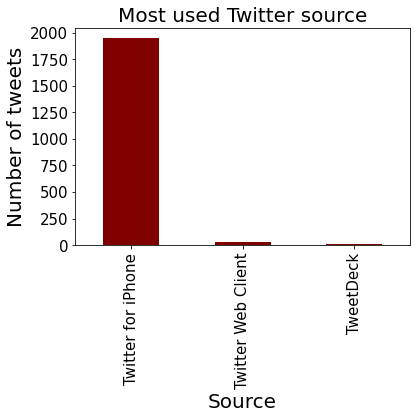

In [93]:
twitter_source.plot.bar(color = 'maroon', fontsize = 15)

#Add labels
plt.title('Most used Twitter source', color = 'black', fontsize = '20')
plt.xlabel('Source', color = 'black', fontsize = '20')
plt.ylabel('Number of tweets', color = 'black', fontsize = '20');

- majority of the data is contributed from twitter on iphone

### Insight 3: The relationship between favorite counts and retweets counts

Correlation Between favorite counts And retweet counts :  0.9284106476844571


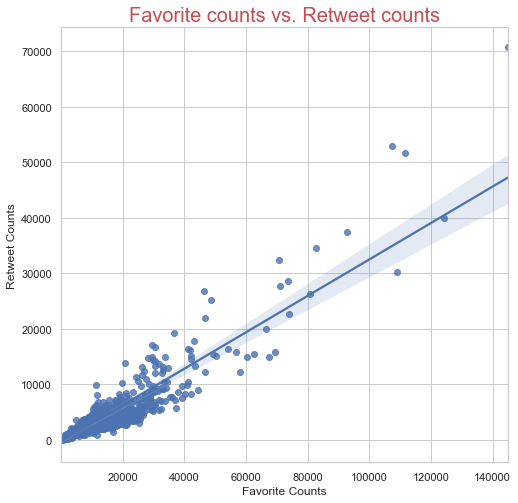

In [94]:
sns.set(rc={'figure.figsize':(8,8)}, style="whitegrid")
sns.regplot(x='favorites', y='retweets', data=df_rate_dogs)

plt.title("Favorite counts vs. Retweet counts",color="r", size=20)
plt.ylabel("Retweet Counts", size=12)
plt.xlabel("Favorite Counts", size=12);

data_corr = df_rate_dogs.corr()

print("Correlation Between favorite counts And retweet counts : ",data_corr.loc['favorites','retweets'])

- The correlation has been used to test statistical relationships between favorite counts and retweet counts. The coefficient is 0.92 so that we can conclude that there is a very high and a positive relationship between the two variables.

### Insight 4: Most popular dog breeds

In [95]:
df_rate_dogs['best_dog'].value_counts()

Golden_Retriever        158
Labrador_Retriever      105
Pembroke                 95
Chihuahua                91
Pug                      62
                       ... 
Japanese_Spaniel          1
Standard_Schnauzer        1
Bouvier_Des_Flandres      1
Irish_Wolfhound           1
Silky_Terrier             1
Name: best_dog, Length: 113, dtype: int64

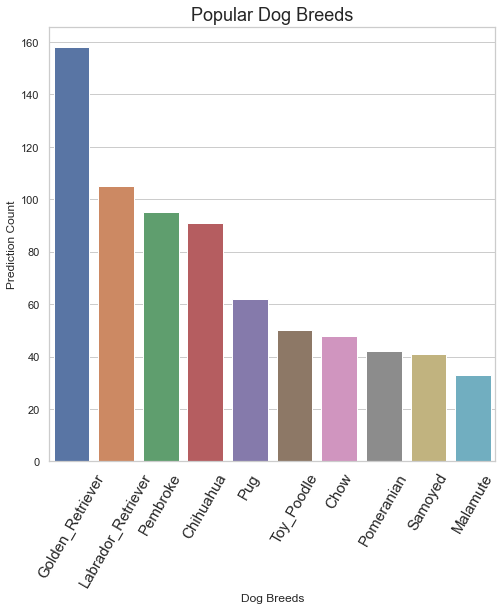

In [96]:
# Most popular dog breeds
plt.figure(figsize = (8,8))
ax = sns.barplot(x = df_rate_dogs['best_dog'].value_counts()[0:10].index,
            y =df_rate_dogs['best_dog'].value_counts()[0:10],
            data = df_rate_dogs);
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60, fontsize = 15);
plt.xlabel("Dog Breeds",fontsize = 12);
plt.ylabel("Prediction Count",fontsize = 12);
plt.title("Popular Dog Breeds",fontsize = 18);

### Insight 5: Top 10 dog breeds by aggregate favorite and retweet counts

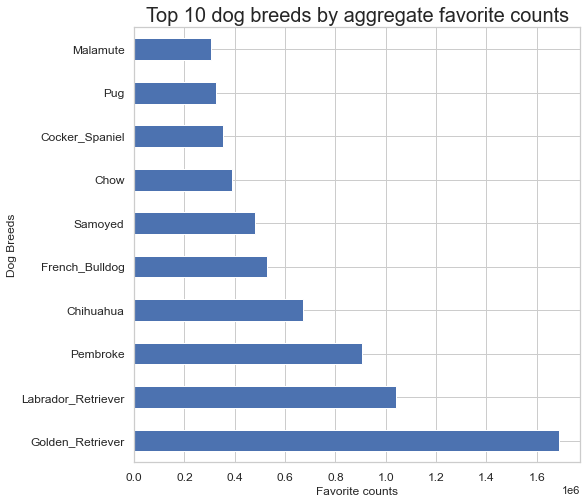

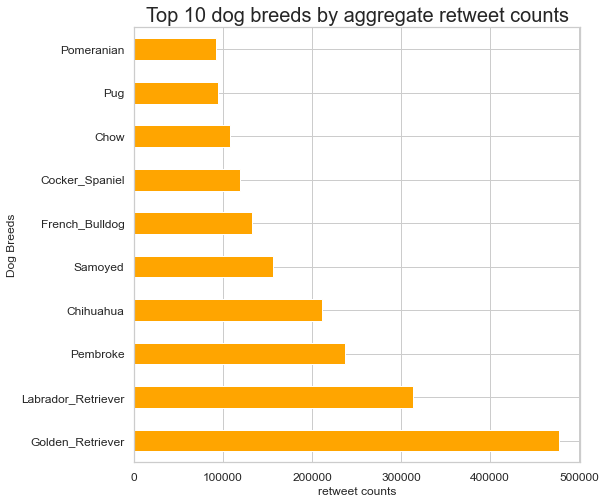

In [97]:
# Extract top 10 favorite breeds
top_10_favorite = df_rate_dogs.groupby('best_dog')['favorites'].sum().sort_values(ascending=True).nlargest(10)
plt.figure(figsize=(8,8))
plt.title("Top 10 dog breeds by aggregate favorite counts", size=20)
top_10_favorite.plot(kind='barh',fontsize=12,color='b')
plt.xlabel('Favorite counts', fontsize=12)
plt.ylabel('Dog Breeds', fontsize=12);
sns.set_style("whitegrid")

# Extract top 10 retweeted breeds
top_10_retweets = df_rate_dogs.groupby('best_dog')['retweets'].sum().sort_values(ascending=False).nlargest(10)
plt.figure(figsize=(8,8))
plt.title("Top 10 dog breeds by aggregate retweet counts", size=20)
top_10_retweets.plot(kind='barh',fontsize=12,color='orange')
plt.xlabel('retweet counts', fontsize=12)
plt.ylabel('Dog Breeds', fontsize=12);
sns.set_style("whitegrid")

### Insight 6: Top 10 dog breeds by average favorite and retweet counts


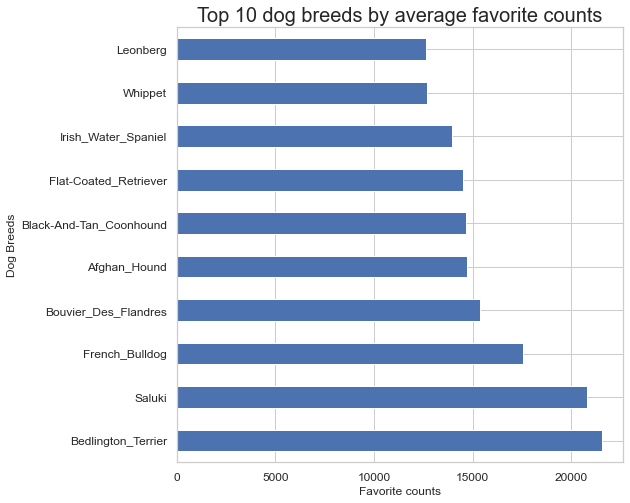

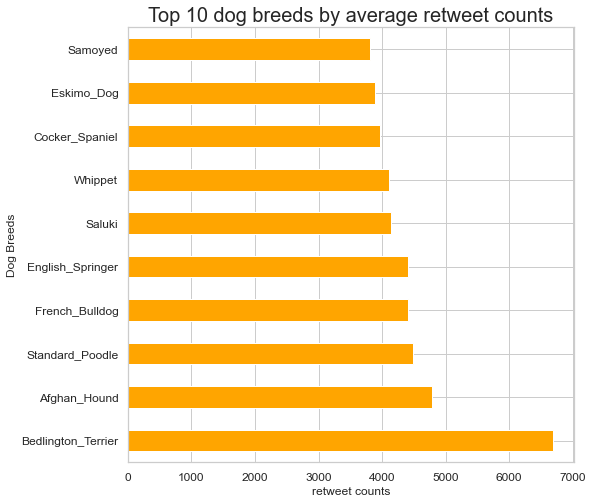

In [98]:
# Extract top 10 favorite breeds
top_10_favorite = df_rate_dogs.groupby('best_dog')['favorites'].mean().sort_values(ascending=True).nlargest(10)
plt.figure(figsize=(8,8))
plt.title("Top 10 dog breeds by average favorite counts", size=20)
top_10_favorite.plot(kind='barh',fontsize=12,color='b')
plt.xlabel('Favorite counts', fontsize=12)
plt.ylabel('Dog Breeds', fontsize=12);
sns.set_style("whitegrid")

# Extract top 10 retweeted breeds
top_10_retweets = df_rate_dogs.groupby('best_dog')['retweets'].mean().sort_values(ascending=False).nlargest(10)
plt.figure(figsize=(8,8))
plt.title("Top 10 dog breeds by average retweet counts", size=20)
top_10_retweets.plot(kind='barh',fontsize=12,color='orange')
plt.xlabel('retweet counts', fontsize=12)
plt.ylabel('Dog Breeds', fontsize=12);
sns.set_style("whitegrid")

### Insight 7: Top 10 dog breeds by high average rating

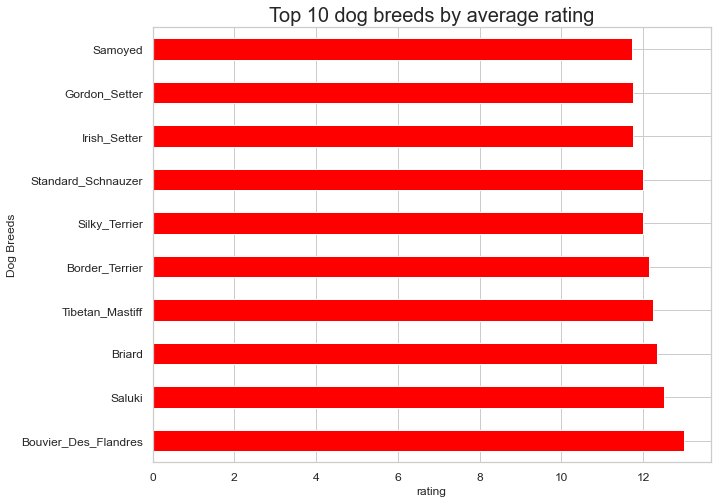

In [99]:
# Extract top 10 average rating breed
top_10_average_rating = df_rate_dogs.groupby('best_dog')['rating'].mean().sort_values(ascending=False).nlargest(10)
plt.figure(figsize=(10,8))
plt.title("Top 10 dog breeds by average rating", size=20)
top_10_average_rating.plot(kind='barh',fontsize=12,color='red')
plt.xlabel('rating', fontsize=12)
plt.ylabel('Dog Breeds', fontsize=12);
sns.set_style("whitegrid")

### Insight 8: Top 10 dog breeds by low average rating

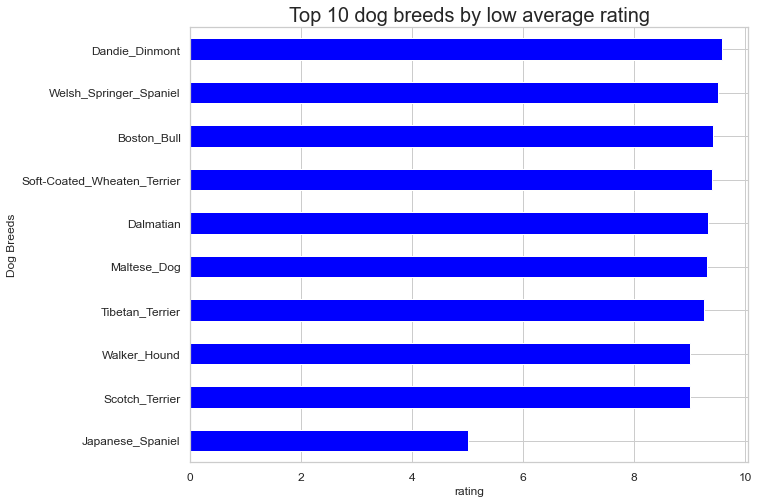

In [100]:
# Extract top 10 average rating breed
top_10_average_rating = df_rate_dogs.groupby('best_dog')['rating'].mean().sort_values(ascending=False).nsmallest(10)
plt.figure(figsize=(10,8))
plt.title("Top 10 dog breeds by low average rating", size=20)
top_10_average_rating.plot(kind='barh',fontsize=12,color='blue')
plt.xlabel('rating', fontsize=12)
plt.ylabel('Dog Breeds', fontsize=12);
sns.set_style("whitegrid")

### Insight 9: Most Common Dog Stage

In [101]:
df_rate_dogs.dog_stage.value_counts()

pupper            203
doggo              62
puppo              22
doggo, pupper       9
floofer             7
doggo, floofer      1
doggo, puppo        1
Name: dog_stage, dtype: int64

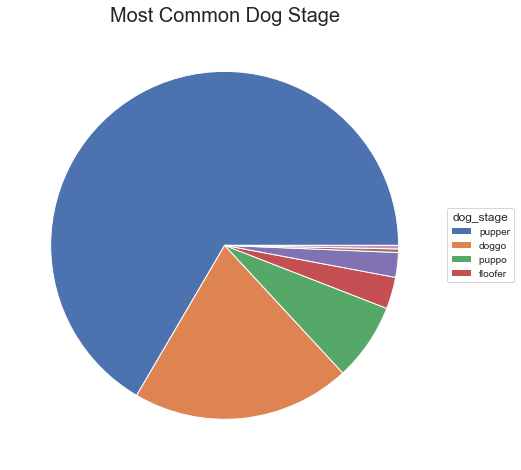

In [102]:
plt.pie(df_rate_dogs.dog_stage.value_counts());
plt.legend(['pupper','doggo','puppo ','floofer'],title="dog_stage" , 
           loc="center left",bbox_to_anchor=(1, 0, 0.5, 1),fontsize=10);
plt.title('Most Common Dog Stage',size =20);

- The most common dog stage is pupper